# EXPLORATORY DATA ANALYSIS 1

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

## TAKEN FROM https://stats.stackexchange.com/questions/403652/two-sample-quantile-quantile-plot-in-python
## Solution provided by user: Artem Mavrin
def qqplot(x, y, quantiles=None, interpolation='nearest', ax=None, rug=False,
           rug_length=0.05, rug_kwargs=None, **kwargs):
    """Draw a quantile-quantile plot for `x` versus `y`.

    Parameters
    ----------
    x, y : array-like
        One-dimensional numeric arrays.

    ax : matplotlib.axes.Axes, optional
        Axes on which to plot. If not provided, the current axes will be used.

    quantiles : int or array-like, optional
        Quantiles to include in the plot. This can be an array of quantiles, in
        which case only the specified quantiles of `x` and `y` will be plotted.
        If this is an int `n`, then the quantiles will be `n` evenly spaced
        points between 0 and 1. If this is None, then `min(len(x), len(y))`
        evenly spaced quantiles between 0 and 1 will be computed.

    interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
        Specify the interpolation method used to find quantiles when `quantiles`
        is an int or None. See the documentation for numpy.quantile().

    rug : bool, optional
        If True, draw a rug plot representing both samples on the horizontal and
        vertical axes. If False, no rug plot is drawn.

    rug_length : float in [0, 1], optional
        Specifies the length of the rug plot lines as a fraction of the total
        vertical or horizontal length.

    rug_kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.axvline() and
        matplotlib.axes.Axes.axhline() when drawing rug plots.

    kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.scatter() when drawing
        the q-q plot.
    """
    import numbers
    import numpy as np
    # Get current axes if none are provided
    if ax is None:
        ax = plt.gca()

    if quantiles is None:
        quantiles = min(len(x), len(y))
        

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation=interpolation)
    y_quantiles = np.quantile(y, quantiles, interpolation=interpolation)

    minimum=np.min([np.min(x),np.min(y)])
    maximum=np.max([np.max(x),np.max(y)])

    # Draw the rug plots if requested
    if rug:
        # Default rug plot settings
        rug_x_params = dict(ymin=0, ymax=rug_length, c='gray', alpha=0.5)
        rug_y_params = dict(xmin=0, xmax=rug_length, c='gray', alpha=0.5)

        # Override default setting by any user-specified settings
        if rug_kwargs is not None:
            rug_x_params.update(rug_kwargs)
            rug_y_params.update(rug_kwargs)

        # Draw the rug plots
        for point in x:
            ax.axvline(point, **rug_x_params)
        for point in y:
            ax.axhline(point, **rug_y_params)

    # Draw the q-q plot
    print(f'Number of quantiles: {len(quantiles)}')
    ax.scatter(x_quantiles, y_quantiles, **kwargs)
    ax.axline([minimum, minimum], [maximum, maximum], color='k')

Mount google drive

Use Kaggle username and key

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'cchristianvw'
os.environ['KAGGLE_KEY'] = '1aa65819dc00a2b28c45d12d55b4760b'


In [2]:
!pip install kaggle

In [39]:
os.chdir('/Users/chris/Notes/masters/BigDataAnalytics/Lab/')

In [40]:
!kaggle competitions download -c titanic
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd

df=pd.read_csv('/Users/chris/Notes/masters/BigDataAnalytics/Lab/eda/train.csv')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Excercise:

* Consider the columns ['Survived',	'Pclass', 'Sex',	'Age',	'SibSp',	'Parch', 'Fare', Embarked']. Also said: ignore ['Ticket','Cabin'].
* Plot the distribution of the previous features using histograms (numerical, ordinal) or barplot (nominal or ordinal).  Mind that showing the barplot of nominal attributes requires first to get their value_counts distribution using: df['nominal_attribute'].value_counts().plot(kind='bar').
* Understand what may be the best option for measuring attribute centrality and dispersion (if needed) and compute them.
* Use a box plot to summarize the 'Fare' attribute. Do it again but grouping by the 'Survived' outcome. Does money buy safety (at least to some degree)?
* Split the dataset into Male and Female passengers and display a qq-plot of the 'Fare' attribute comparing the two groups. What does it mean? Is it possible to find a simple reason why this is the result or not?
* Plot a stratified barplot: the barplot should have on the x axis the 'Embarked' attribute and be stratified by the 'Pclass' attribute. Given that C = Cherbourg (France) , Q = Queenstown (Ireland), S = Southampton (UK); which city had the highest percentage of emigrants from the lower social classes?
* Check whether  the 'Survived' attribute is correlated with 'Pclass' or 'Sex'.
* Define a new attribute 'Children' (choose an Age threshold) and compute its correlation with 'Survival'.
* Check whether the 'Survived' attribute is correlated with 'Age', 'Fare', 'SibSp', or	'Parch'.
* Display a scatterplot between "Age" and "Fare" and compute correlation between them using multiple methods. Was the computation of correlation really needed in this case?

Hints:
* quantiles of an attribute ca be computed using df['Attribute'].quantile(q)
* stratified bar plot should not be directly applied to the dataframe. Think about the ingredients needed to create it and give a look that the pandas.crosstab function at https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html


## Esercizio 1

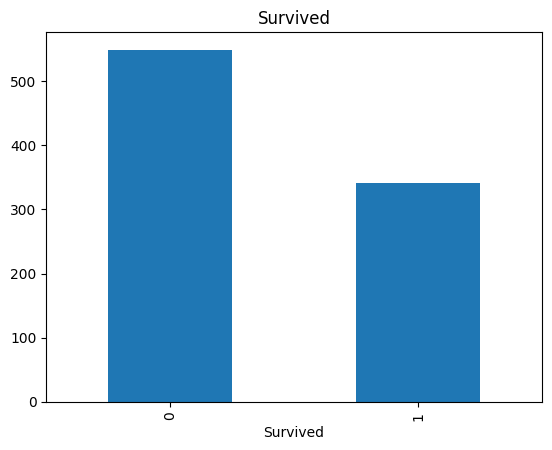

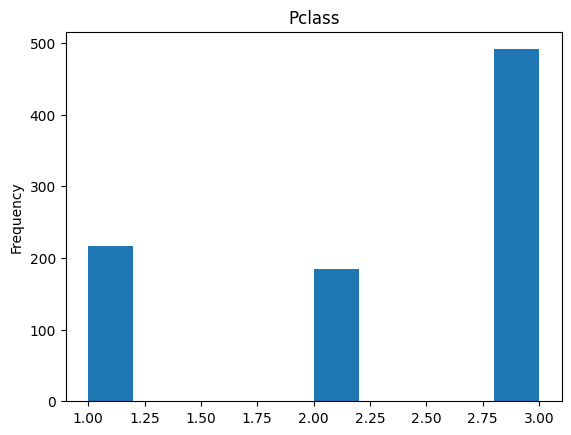

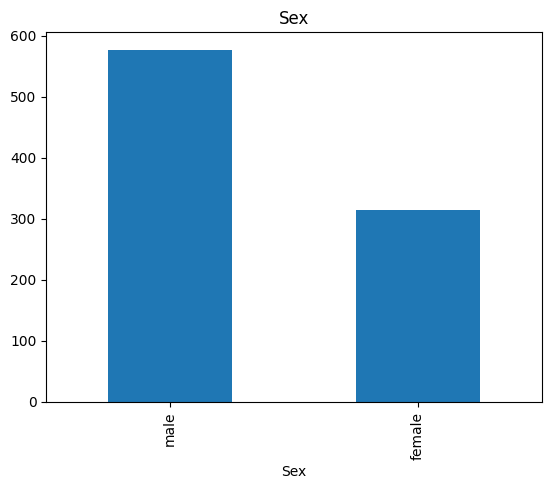

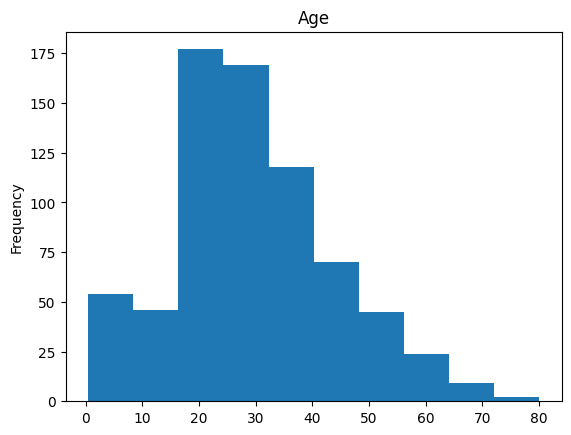

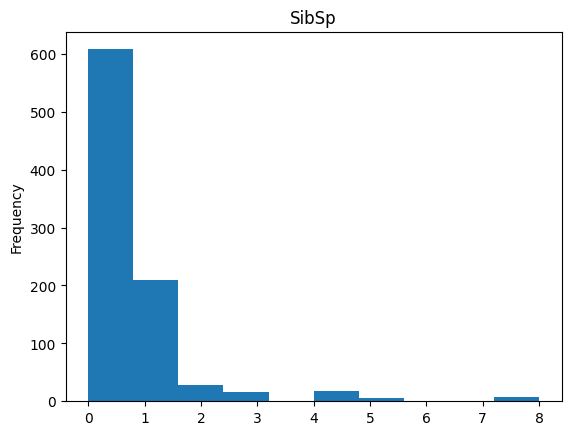

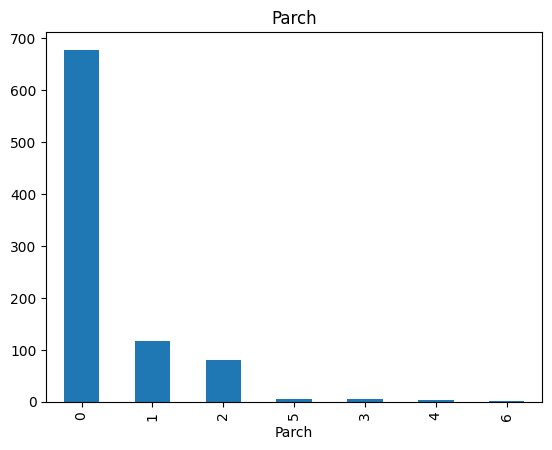

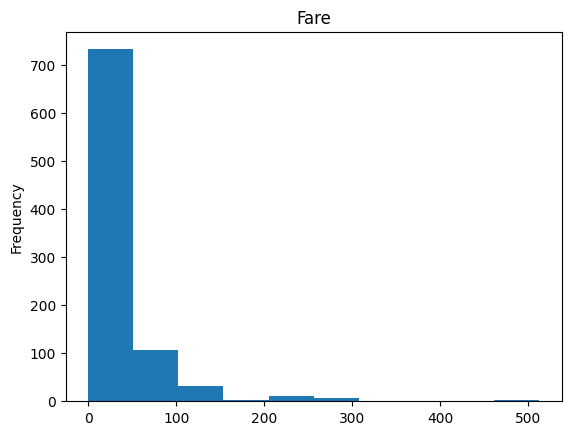

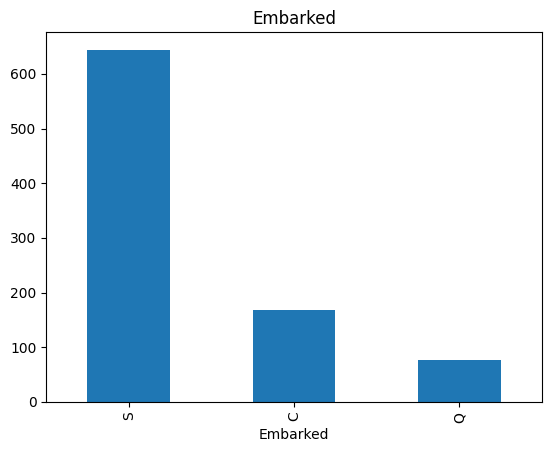

In [91]:
# con istrogramma -> df['Survived'].plot.hist(title='Survived')
df['Survived'].value_counts().plot.bar(title='Survived')
plt.show()

df['Pclass'].plot.hist(title='Pclass')
plt.show()

df['Sex'].value_counts().plot.bar(title='Sex')
plt.show()

df['Age'].plot.hist(title='Age')
plt.show()

df['SibSp'].plot.hist(title='SibSp')
plt.show()

df['Parch'].value_counts().plot.bar(title='Parch')
plt.show()

df['Fare'].plot.hist(title='Fare')
plt.show()

df['Embarked'].value_counts().plot.bar(title='Embarked')
plt.show()


<br>

## Esercizio 2

* Understand what may be the best option for measuring attribute centrality and dispersion (if needed) and compute them.
* Use a box plot to summarize the 'Fare' attribute. Do it again but grouping by the 'Survived' outcome. Does money buy safety (at least to some degree)?

In [123]:
print(f'Mode of the Survived attribute: {df['Survived'].mode()[0]}')
print(f'Mode of the Sex attribute: {df['Sex'].mode()[0]}')
print(f'Mode of the Embarked attribute: {df['Embarked'].mode()[0]}')
print(f'Mode of the PClass attribute: {df['Pclass'].mode()[0]}')
print()
print(f'Median and IQR for PClass attribute: {df['Pclass'].median()} [{df['Pclass'].quantile(0.25)},{df['Pclass'].quantile(0.75)}]')
print(f'Median and IQR for SibSp attribute {df["SibSp"].median()} [{df["SibSp"].quantile(0.25)},{df["SibSp"].quantile(0.75)}]')
print(f'Median and IQR for Parch attribute {df["Parch"].median()} [{df["Parch"].quantile(0.25)},{df["Parch"].quantile(0.75)}]')
print(f'Median and IQR for Fare attribute {df["Fare"].median()} [{df["Fare"].quantile(0.25)},{df["Fare"].quantile(0.75)}]')

Mode of the Survived attribute: 0
Mode of the Sex attribute: male
Mode of the Embarked attribute: S
Mode of the PClass attribute: 3
IQR for survived: 1.0
Median and IQR for PClass attribute: 3.0 [2.0,3.0]
Median and IQR for SibSp attribute 0.0 [0.0,1.0]
Median and IQR for Parch attribute 0.0 [0.0,0.0]
Median and IQR for Fare attribute 14.4542 [7.9104,31.0]


<Axes: title={'center': 'Fare'}, xlabel='Survived'>

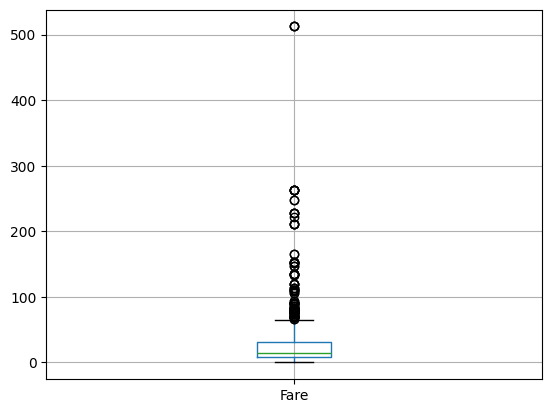

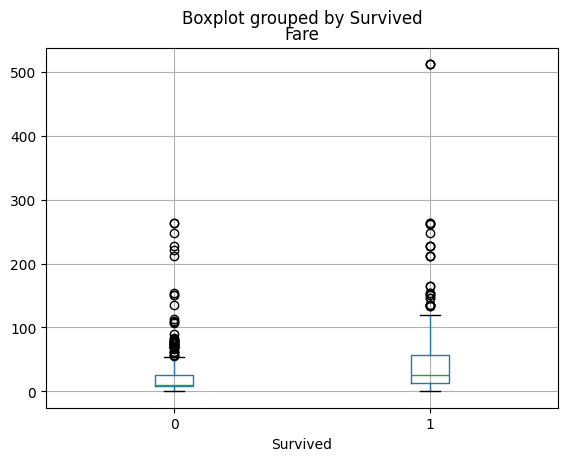

In [124]:
df.boxplot('Fare')
df.boxplot('Fare',by='Survived')

* Split the dataset into Male and Female passengers and display a qq-plot of the 'Fare' attribute comparing the two groups. What does it mean? Is it possible to find a simple reason why this is the result or not?
* Plot a stratified barplot: the barplot should have on the x axis the 'Embarked' attribute and be stratified by the 'Pclass' attribute. Given that C = Cherbourg (France) , Q = Queenstown (Ireland), S = Southampton (UK); which city had the highest percentage of emigrants from the lower social classes?
* Check whether  the 'Survived' attribute is correlated with 'Pclass' or 'Sex'.
* Define a new attribute 'Children' (choose an Age threshold) and compute its correlation with 'Survival'.
* Check whether the 'Survived' attribute is correlated with 'Age', 'Fare', 'SibSp', or	'Parch'.
* Display a scatterplot between "Age" and "Fare" and compute correlation between them using multiple methods. Was the computation of correlation really needed in this case?

/var/folders/mz/2x3r_7v12sl_hfwrgd4nzpm00000gn/T/ipykernel_92800/2935370937.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  qqplot(male_fares,female_fares,c='r',alpha=0.5,edgecolor='k',rug=True)


Number of quantiles: [0.         0.00319489 0.00638978 0.00958466 0.01277955 0.01597444
 0.01916933 0.02236422 0.02555911 0.02875399 0.03194888 0.03514377
 0.03833866 0.04153355 0.04472843 0.04792332 0.05111821 0.0543131
 0.05750799 0.06070288 0.06389776 0.06709265 0.07028754 0.07348243
 0.07667732 0.0798722  0.08306709 0.08626198 0.08945687 0.09265176
 0.09584665 0.09904153 0.10223642 0.10543131 0.1086262  0.11182109
 0.11501597 0.11821086 0.12140575 0.12460064 0.12779553 0.13099042
 0.1341853  0.13738019 0.14057508 0.14376997 0.14696486 0.15015974
 0.15335463 0.15654952 0.15974441 0.1629393  0.16613419 0.16932907
 0.17252396 0.17571885 0.17891374 0.18210863 0.18530351 0.1884984
 0.19169329 0.19488818 0.19808307 0.20127796 0.20447284 0.20766773
 0.21086262 0.21405751 0.2172524  0.22044728 0.22364217 0.22683706
 0.23003195 0.23322684 0.23642173 0.23961661 0.2428115  0.24600639
 0.24920128 0.25239617 0.25559105 0.25878594 0.26198083 0.26517572
 0.26837061 0.2715655  0.27476038 0.2779552

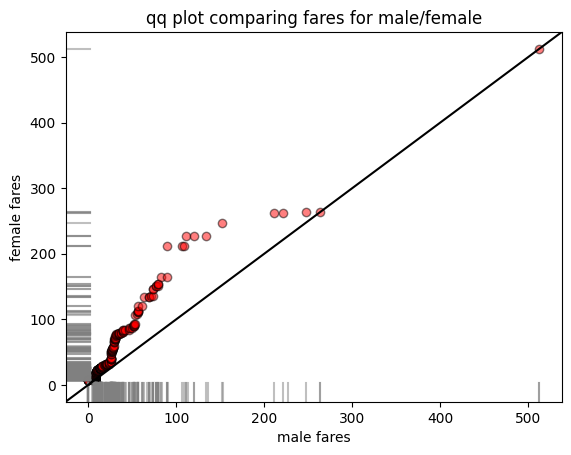

In [158]:
male_fares = df.loc[df['Sex'] == 'male']['Fare'].values
female_fares = df.loc[df['Sex'] == 'female']['Fare'].values

# draw q-q plot with rug plot
plt.figure()
qqplot(male_fares,female_fares,c='r',alpha=0.5,edgecolor='k',rug=True)
plt.xlabel('male fares')
plt.ylabel('female fares')
plt.title('qq plot comparing fares for male/female')
plt.show()
plt.close()